In [77]:
import os
import time
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [122]:
sizes = [ 1000, 10000, 50000]

In [123]:
seeds = [845, 12, 777]

In [124]:
command_path = "..\\BuildDebug\\test_driver4.exe"

In [125]:
def run_tests( sizes : list, seeds : list, use_containter : str, mode : str) -> list: 
    
    times = []

    for i in sizes:

        current = []

        for seed in seeds:

            command = " ".join([command_path, str(i), str(seed), use_containter, mode])

            #print(command)

            start_time = time.time_ns()

            ret = os.system(command)

            assert ret == 0

            finish_time =  time.time_ns()

            time_diff_ms = (finish_time - start_time) / 1000000

            print( i, seed, time_diff_ms )

            current.append(time_diff_ms)

        times.append( np.array(current).mean() )
        
        
    return times

In [126]:
containers = [ 'bst', 'set', 'avl']
modes = ['random', 'seq']

In [127]:
times_bst_seq = run_tests(sizes, seeds, 'bst', 'seq')

1000 845 28.0472
1000 12 26.237
1000 777 26.7521
10000 845 531.991
10000 12 536.0517
10000 777 538.9737
50000 845 13847.7678
50000 12 14054.9441
50000 777 14089.038


In [128]:
times_avl_seq = run_tests(sizes, seeds, 'avl', 'seq')

1000 845 26.2808
1000 12 22.2226
1000 777 21.0331
10000 845 26.9979
10000 12 27.0026
10000 777 25.9979
50000 845 52.9973
50000 12 53.4257
50000 777 52.8948


In [129]:
times_set_seq = run_tests(sizes, seeds, 'set', 'seq')

1000 845 24.2421
1000 12 23.2358
1000 777 22.0033
10000 845 26.999
10000 12 25.9989
10000 777 25.9987
50000 845 52.9986
50000 12 54.9982
50000 777 55.1993


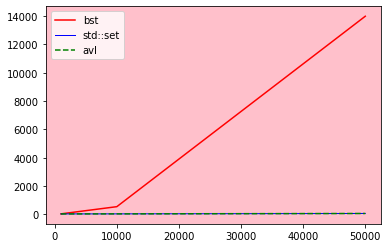

In [139]:
ax = plt.axes()
ax.set_facecolor("pink")
plt.plot(sizes, times_bst_seq, 'r', label='bst')
plt.plot(sizes, times_set_seq, 'b', label='std::set',linewidth=1)
plt.plot(sizes, times_avl_seq,'g--', label='avl')
plt.legend();

In [104]:
sizes = [ 1000, 10000, 100000, 1000000]

In [105]:
times_avl_seq = run_tests(sizes, seeds, 'avl', 'seq')

1000 845 23.5222
1000 12 23.1586
1000 777 20.6377
10000 845 27.999
10000 12 26.9997
10000 777 25.9989
100000 845 86.9975
100000 12 89.1598
100000 777 87.9868
1000000 845 767.5268
1000000 12 772.9783
1000000 777 756.1892


In [106]:
times_set_seq = run_tests(sizes, seeds, 'set', 'seq')

1000 845 24.0435
1000 12 21.3461
1000 777 21.9997
10000 845 27.9994
10000 12 26.999
10000 777 26.9991
100000 845 89.9978
100000 12 90.9977
100000 777 89.9972
1000000 845 771.9783
1000000 12 789.9708
1000000 777 772.0077


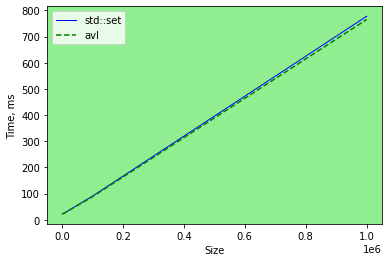

In [115]:
ax = plt.axes()
ax.set_facecolor("lightgreen")
plt.plot(sizes, times_set_seq, 'b', label='std::set',linewidth=1)
plt.plot(sizes, times_avl_seq,'g--', label='avl')
plt.xlabel("Size")
plt.ylabel("Time, ms")
plt.legend();

In [116]:
times_avl_random = run_tests(sizes, seeds, 'avl', 'random')

1000 845 22.0005
1000 12 22.1135
1000 777 21.3647
10000 845 25.8525
10000 12 24.9989
10000 777 28.0254
100000 845 53.9991
100000 12 53.9995
100000 777 54.9984
1000000 845 202.9944
1000000 12 203.0043
1000000 777 202.9556


In [117]:
times_set_random = run_tests(sizes, seeds, 'set', 'random')

1000 845 24.4356
1000 12 21.5968
1000 777 20.9984
10000 845 25.9997
10000 12 24.9992
10000 777 24.9993
100000 845 59.9985
100000 12 62.5262
100000 777 61.9966
1000000 845 303.2115
1000000 12 301.9921
1000000 777 302.9918


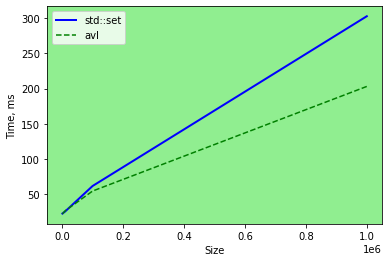

In [119]:
ax = plt.axes()
ax.set_facecolor("lightgreen")
plt.plot(sizes, times_set_random, 'b', label='std::set', linewidth=2)
plt.plot(sizes, times_avl_random,'g--', label='avl')
plt.xlabel("Size")
plt.ylabel("Time, ms")
plt.legend();